<a href="https://colab.research.google.com/github/EvgenyEsin/Machine_learning/blob/main/Machine_learning_lesson_11_dop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Качество модели и ее улучшение

## Кросс-валидация
Кросс-валидация — это метод, предназначенный для оценки качества работы
модели, широко применяемый в машинном обучении. Он помогает сравнить между
собой различные модели и выбрать наилучшую для конкретной задачи. В этом
разделе мы рассмотрим наиболее распространённые методы кросс-валидации, а
также обсудим возможные проблемы, которые могут возникнуть в процессе их
применения.

## Hold-out
Метод hold-out представляет собой простое разделение на train и test:
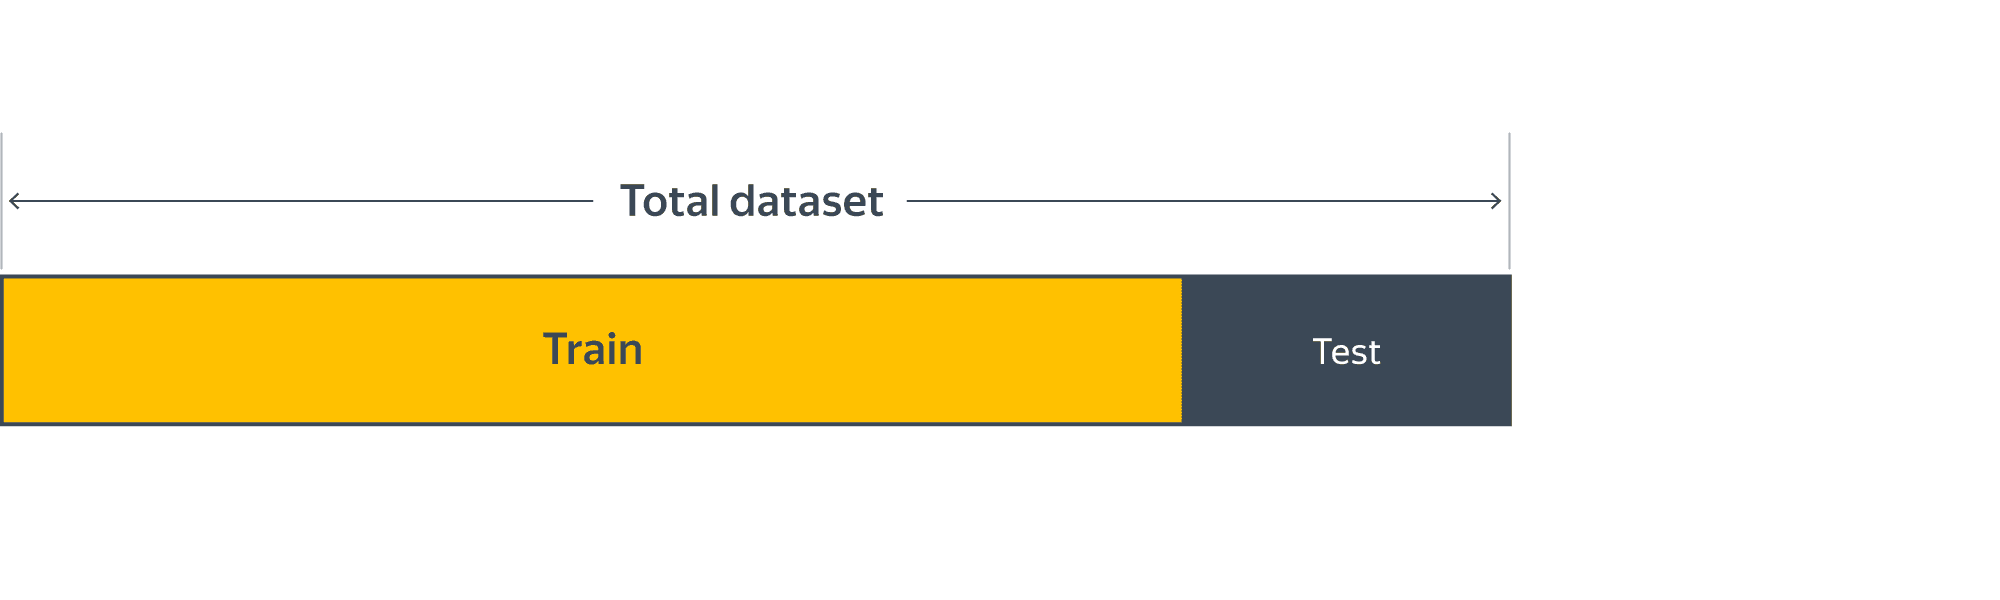

Чтобы оценить модель, вы обучаете её на тренировочном множестве, а результаты
измеряете на тестовом. У модуля, которым мы пользуемся для обучения модели -
sklearn, по дефолту выставлен параметр shuffle=True, то есть перед разделением на
тренировочное и тестовое множества происходит перемешивание объектов, или
как их еще называют, семплов (и для воспроизводимости такого разбиения нужно
фиксировать random_state).
Такое разделение очень легко реализовать с помощью sklearn:

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(1000).reshape((500, 2)), np.arange(500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Здесь сразу хочется отметить, что, если у вас достаточно данных, лучше всегда
предусматривать также валидационное множество. Давайте разберемся что такое
валидационные данные.
Валидационные данные ("удержанные" данные) – это часть Датасета, основа для
проверки работоспособности Модели.
Приведу пример. Мы создаем модель, предсказывающую потребление
электроэнергии в городе. Если на тренировочных данных эта модель учится видеть
скачки потребления электричества, то на тестовой выборке мы проверяем качество
обучения. Но зачем нужна валидационная часть?
6
Введение валидационной выборки связано с проблемой переобучения. Чтобы
решить эту проблему, мы можем создать дополнительную валидационную часть
датасета, и проверять качество модели на любом подходящем этапе разработки, то
есть практически во время обучения.
Если вы перебираете какие-то модели для вашей задачи, то оптимизировать их
качества стоит на валидационном множестве, а окончательное сравнение моделей
проводить на тестовом множестве. Оптимизация качеств модели может включать в
себя подбор гиперпараметров, подбор архитектуры (в случае нейросеток), и т. д.
Если оптимизировать качества моделей и проводить их сравнение на одном и том
же множестве, то может получиться следующая ситуация: модель станет
переобученной, то есть подстроиться под данные, а не найдет зависимости в них
Давайте посмотрим, как реализовать валидационную выборку в Пайтон

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(1000).reshape((500, 2)), np.arange(500)
X_train, X_test, y_train, y_test = train_test_split(
X, y,
test_size=0.2,
random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
X_train, y_train,
test_size=0.1,
random_state=42
)

Для окончательного применения найденную лучшую модель можно обучить на всех
имеющихся данных. Правда, вы не сможете оценить качество получившейся
модели, так как у вас уже не будет тестового множества. Чтобы примерно оценить,
как будет вести себя модель при добавлении новых данных, вы можете построить
кривые обучения: графики качества модели на тренировочной и тестовой
выборках в зависимости от числа поданных семплов на вход. Кривые обучения
могут выглядеть следующим образом (код для отрисовки таких кривых можно
найти в документации sklearn):

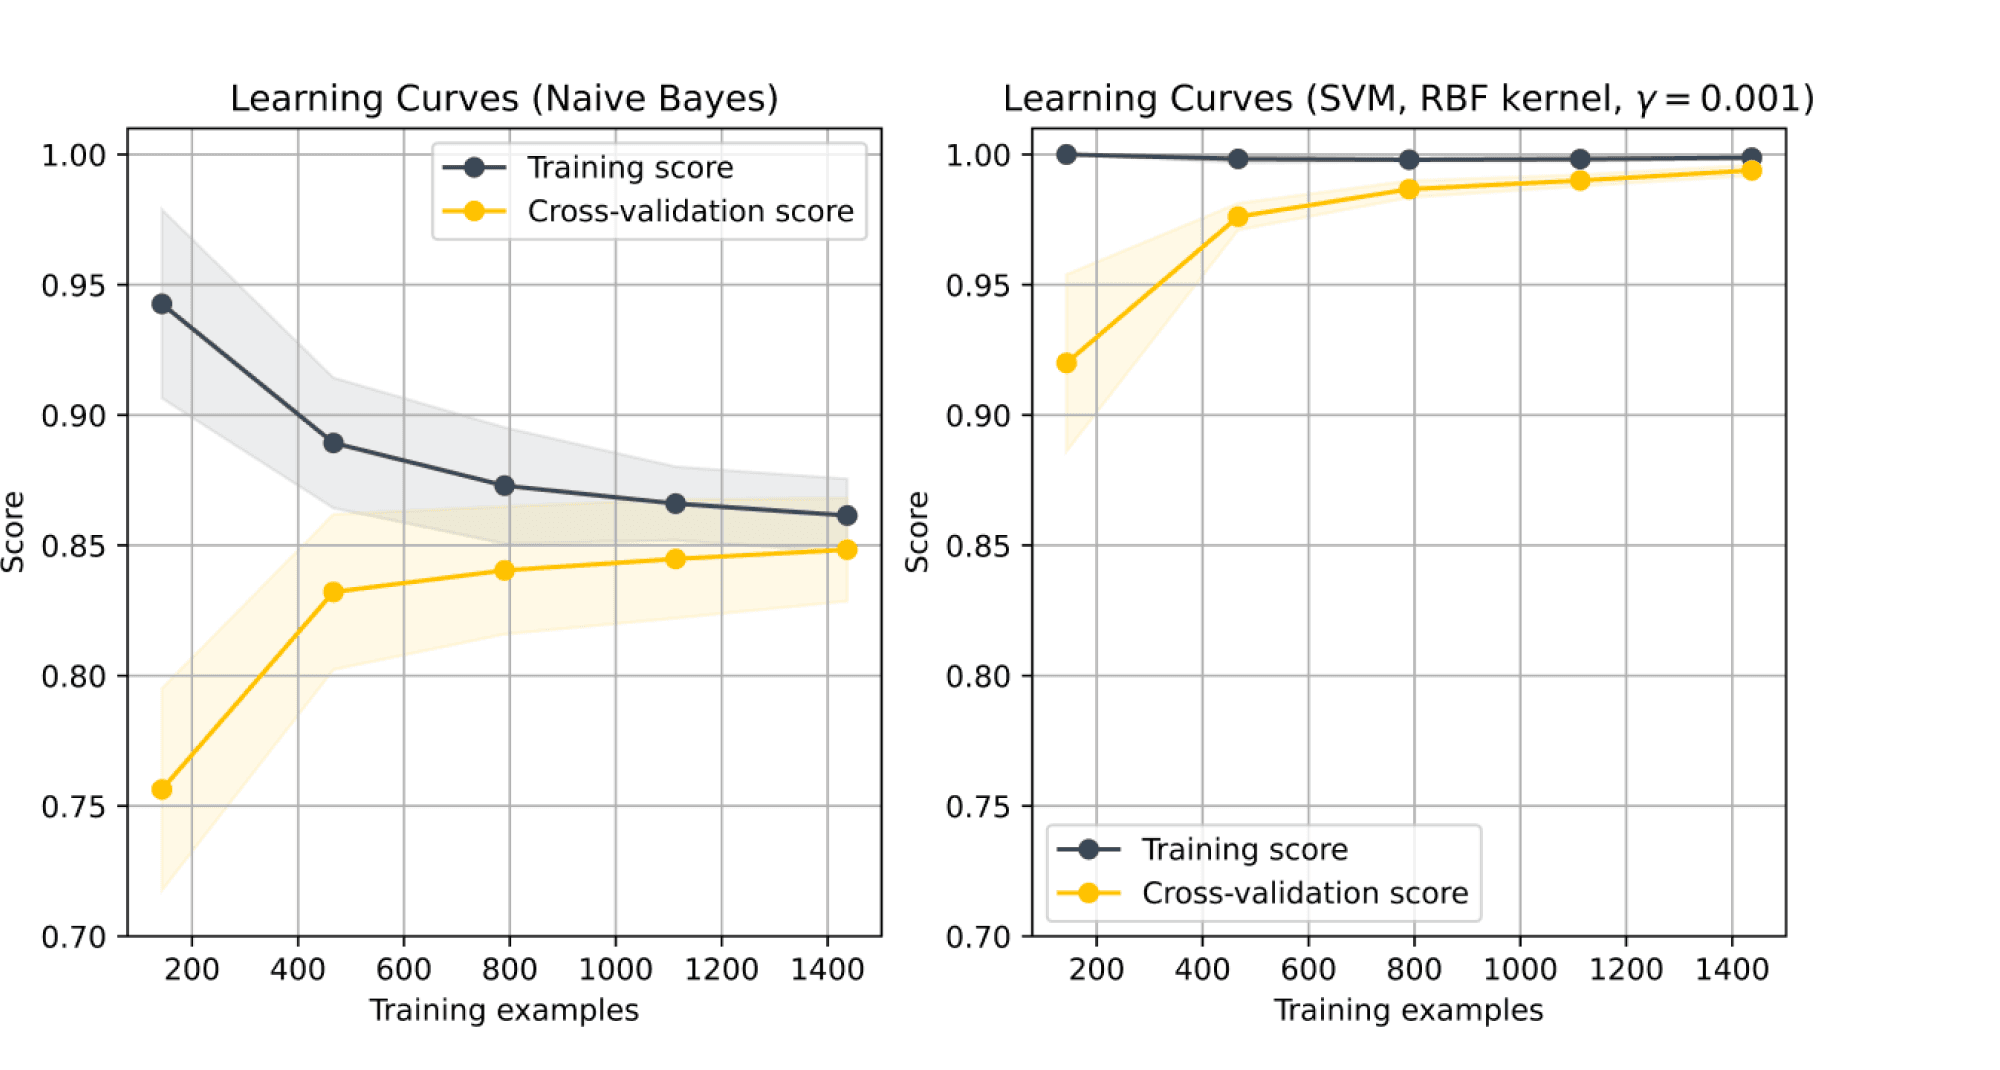

Если по графикам можно судить, что качество модели по валидационным метрикам
продолжает расти, добавление новых данных может дать повышение качества. На
картинке выше приведены кривые обучения двух моделей на одном и том же
датасете. Модель слева показала итоговые результаты явно хуже модели справа (и
график качества на валидации у неё близок к плато, хотя и продолжает расти), а
качество модели справа могло бы ещё вырасти при добавлении дополнительных
семплов (качество на трейне константно высокое, а на валидации возрастает).

## Стратификация (stratification)
При простом случайном разделении на тренировочное и тестовое множества (как в
примерах выше) может случиться так, что распределения тренировочного и
тестового множеств окажутся не такими, как у всего исходного множества. Давайте
проиллюстрирует такую ситуацию следующим образом. Допустим у нас есть три
класса, и распределение объектов в них равное.
Случайное разбиение может привести к следующей ситуации: в тренировочной
выборке будет не равное количество объектов из разных классов. Соответственно,
это будет ошибочное распределение, ведь изначально это было не так. Это может
8
привести к дисбалансу классов, и, следовательно, к плохим прогнозам модели. При
этом мы можем столкнуться с ситуацией, что распределение классов не только
несбалансированное, но и разное: самый частный класс в тренировочной выборке
соответствует наименее частому классу в тестовой выборке
На помощь в такой ситуации может прийти стратификация: разбиение на трейн и
тест, сохраняющее соотношение классов, представленное в исходном датасете. В
sklearn такое разбиение можно получить с помощью параметра stratify:

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(1000).reshape((500, 2)), np.random.choice(4, size=500, p=[0.1, 0.2,
0.3, 0.4])
X_train, X_test, y_train, y_test = train_test_split(
X, y,
test_size=0.2,
random_state=42,
stratify=y
)

В целом на достаточно больших датасетах (порядка хотя бы 10 тысяч семплов) со
сбалансированными классами можно не очень сильно беспокоиться об описанной
выше проблеме и использовать обычный random split. Но если у вас очень
несбалансированные данные, в которых один класс встречается сильно чаще
другого (как, например, в задачах фильтрации спама или сегментации осадков на
спутниковых снимках), стратификация может довольно сильно помочь.

## K-Fold
Метод k-Fold чаще всего имеют в виду, когда говорят о кросс-валидации. Он
является обобщением метода hold-out и представляет собой следующий алгоритм:
● Фиксируется некоторое целое число k (обычно от 5 до 10), меньшее числа
семплов в датасете.
● Датасет разбивается на K одинаковых частей (в последней части может быть
меньше семплов, чем в остальных). Эти части называются фолдами.
9
● Далее происходит K итераций, во время каждой из которых один фолд
выступает в роли тестового множества, а объединение остальных — в роли
тренировочного. Модель учится на
● K−1 фолде и тестируется на оставшемся. Финальное качество модели
получается либо усреднением
● K получившихся тестовых результатов, либо измеряется на отложенном
тестовом множестве, не участвовавшем в кросс-валидации.

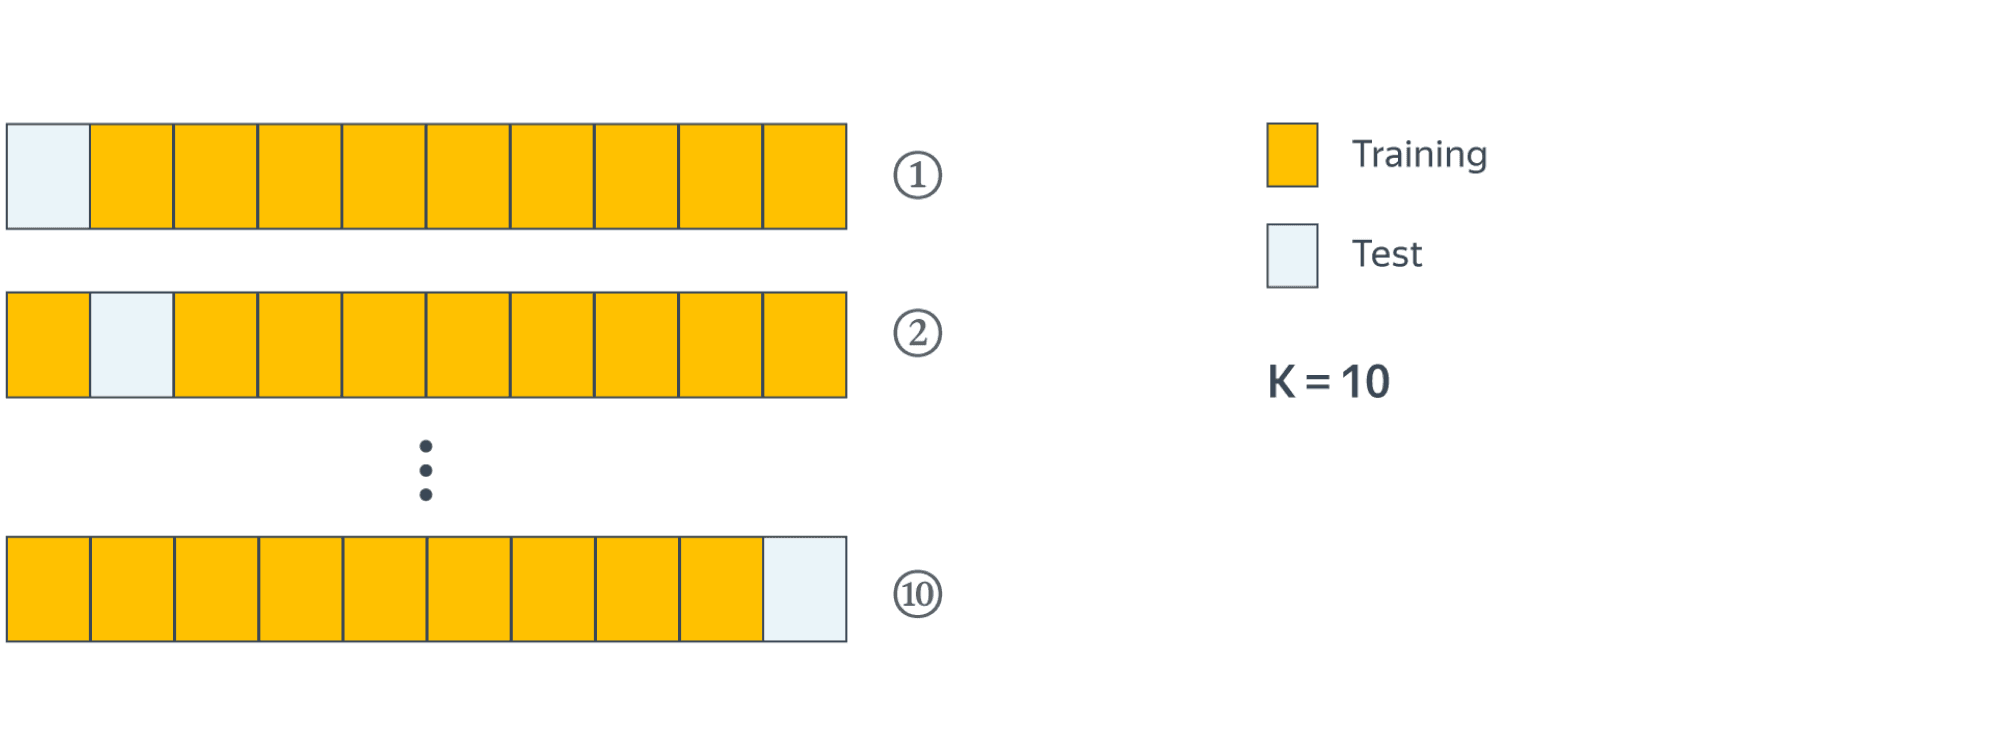

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
for train_index, test_index in kf.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


В коде выше получилось два фолда: в первый вошли объекты с индексами 2 и 3, во
второй — объекты с индексами 0 и 1. На первой итерации алгоритма фолд с
индексами 2 и 3 будет тренировочным, а на второй — фолд с индексами 0 и 1. В
sklearn есть также метод cross_val_score, принимающий на вход классификатор,
данные и способ разбиения данных (либо число фолдов) и возвращающий
результаты кросс-валидации:

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)

ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=4.

Интересный вопрос состоит в том, какую модель брать для сравнения с остальными
на отложенном тестовом множестве (если оно у вас есть) либо для окончательного
применения в задаче. После применения k-Fold для одной модели у вас на руках
останется K экземпляров (инстансов) этой модели, обученных на разных
подмножествах трейна. Возможные варианты:

● делать предсказание с помощью усреднения предсказаний этих K

● из этих K экземпляров выбрать тот, который показал лучшее качество на
своём тестовом фолде, и применять дальше его;

● заново обучить модель уже на всех K фолдах и делать предсказания уже этой
моделью.

Выбирать, какой способ лучше, нужно в зависимости от конкретной задачи и
имеющихся вычислительных возможностей.
Метод k-Fold даёт более надёжную оценку качества модели, чем hold-out, так как
обучение и тест модели происходят на разных подмножествах исходного датасета.
Однако проведение K итераций обучения и теста может быть вычислительно
затратным, и поэтому метод обычно применяют либо когда данных достаточно
мало, либо при наличии большого количества вычислительных ресурсов,
позволяющих проводить все K итераций параллельно. В реальных задачах данных
зачастую достаточно много для того, чтобы hold-out давал хорошую оценку
качества модели, поэтому k-Fold в больших задачах применяется не очень часто.

## Leave-one-out
Метод leave-one-out (LOO) является частным случаем метода k-Fold: в нём каждый
фолд состоит ровно из одного семпла. LOO тоже есть в sklearn:

In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([1, 2, 3])
loo = LeaveOneOut()
for train_index, test_index in loo.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 2] TEST: [0]
TRAIN: [0 2] TEST: [1]
TRAIN: [0 1] TEST: [2]


Этот метод может понадобиться в случае, если у вас очень мало данных (например,
в задаче сегментации клеток на изображениях с оптического микроскопа) и вы
хотите использовать максимальное их количество для обучения модели: для
валидации на каждой итерации методу требуется всего один семпл. Однако и
итераций будет столько, сколько семплов в данных, поэтому метод неприменим для
средних и больших задач.

## Stratified k-Fold
Метод stratified k-Fold — это метод k-Fold, использующий стратификацию при
разбиении на фолды: каждый фолд содержит примерно такое же соотношение
классов, как и всё исходное множество (подробнее о стратификации говорилось
выше). Такой подход может потребоваться в случае, например, очень
несбалансированного соотношения классов, когда при обычном random split
некоторые фолды могут либо вообще не содержать семплов каких-то классов, либо
содержать их слишком мало. Этот метод также представлен в sklearn:

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
skf = StratifiedKFold(n_splits=2)
for train_index, test_index in skf.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 3] TEST: [0 2]
TRAIN: [0 2] TEST: [1 3]


## Кросс-валидация на временных рядах
Существует такая задача, как прогнозирование временных рядов. На практике она
часто возникает в форме «Что будет с показателями нашего продукта в ближайший
день / месяц / год?». При этом имеются какие-то исторические данные этих
показателей за предыдущее время, которые можно визуализировать в виде
некоторого графика по времени:

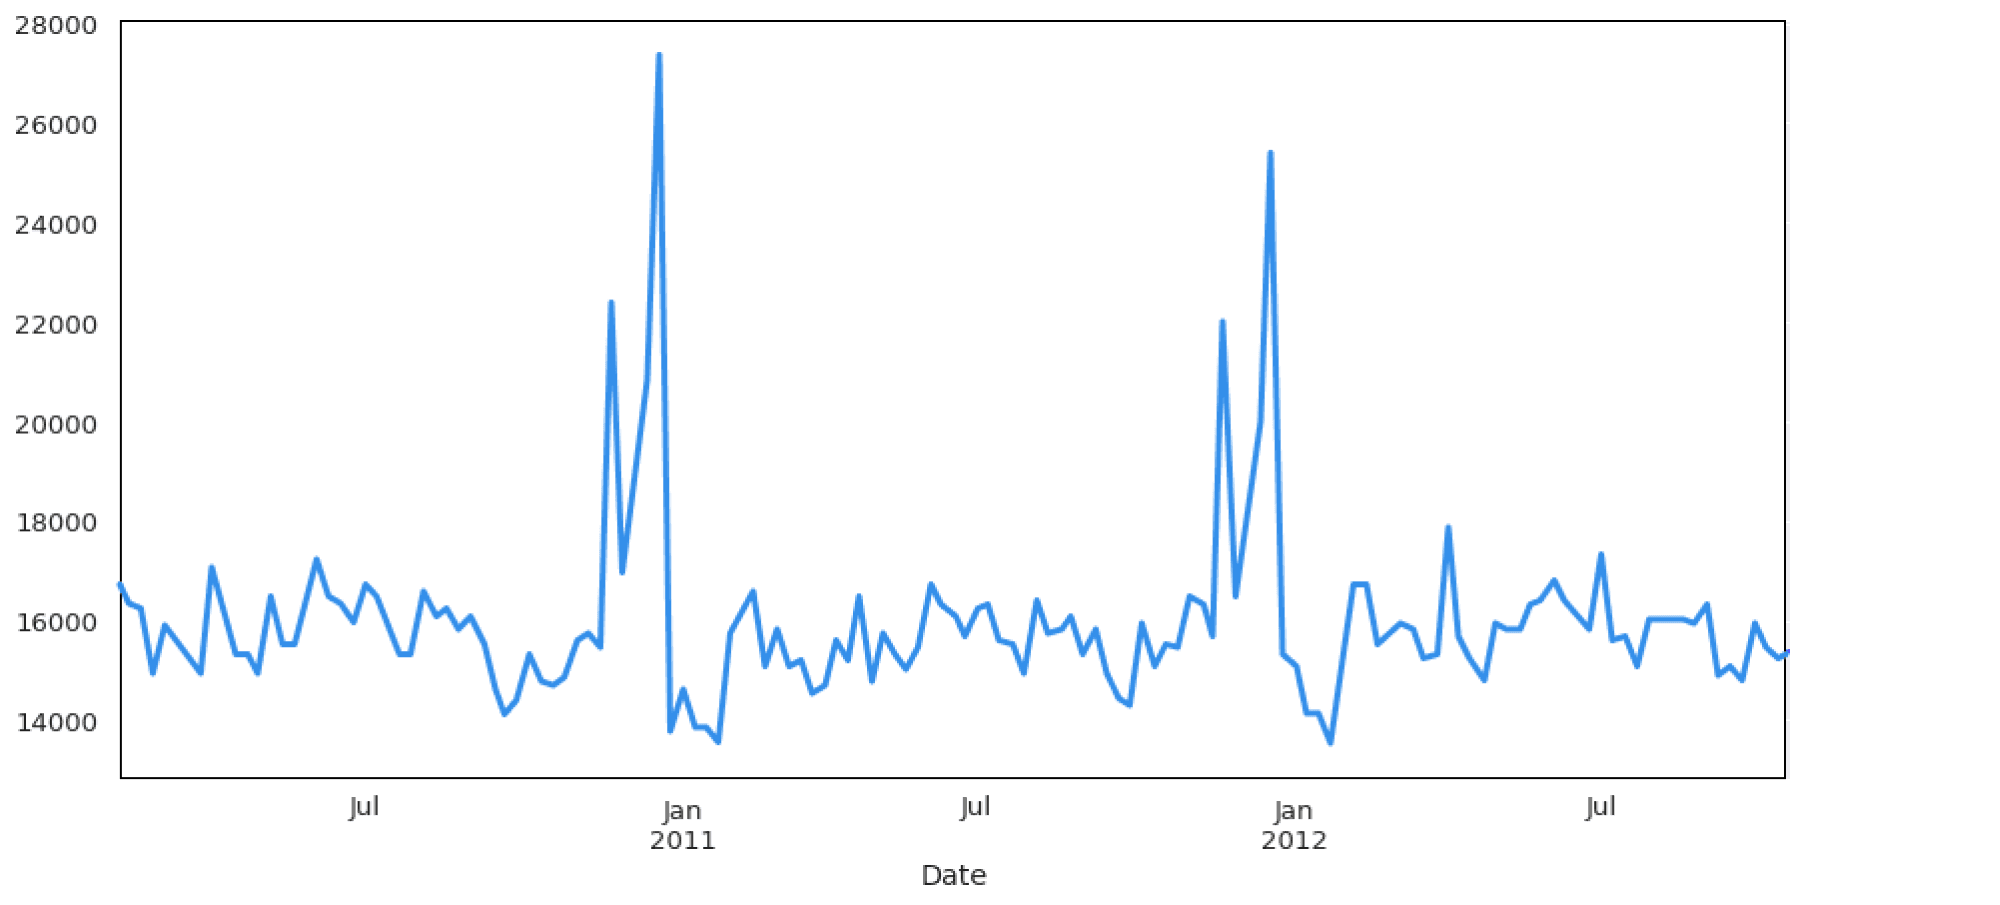

Этот график — пример графика временного ряда, и наша задача — спрогнозировать,
как будет выглядеть данный график в будущие моменты времени. Кросс-валидация
моделей для такой задачи осложняется тем, что данные не должны пересекаться по
времени: тренировочные данные должны идти до валидационных, а
валидационные — до тестовых. С учётом этих особенностей фолды в
кросс-валидации для временных рядов располагаются вдоль временной оси так,
как показано на следующей картинке:

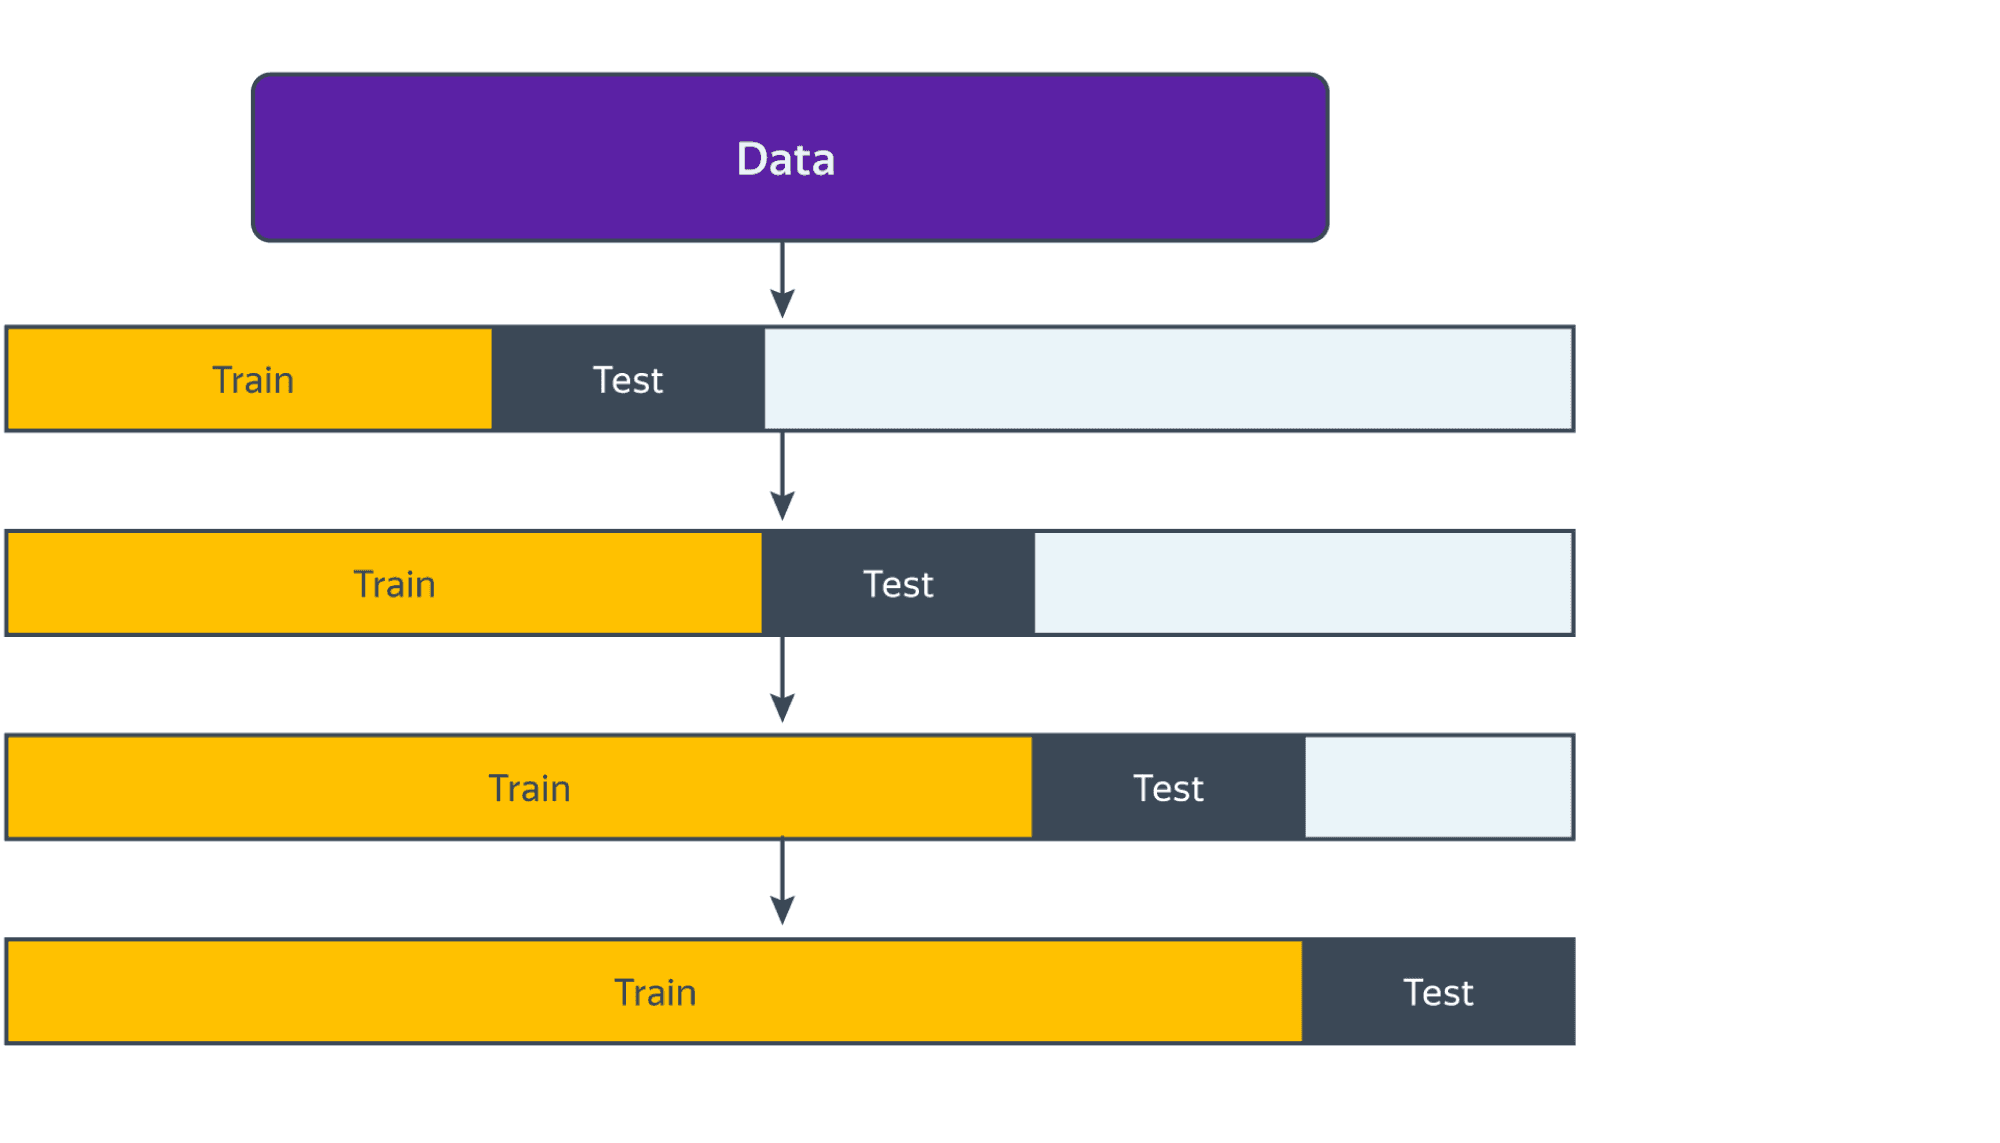

В sklearn реализована такая схема кросс-валидации:

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit()
print(tscv)
for train_index, test_index in tscv.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


## Гиперпараметры
гиперпараметр, это характеристика
модели, которая фиксируется в начале обучения, то есть задается вручную
инженером, например глубина решающего дерева, или количество кластеров в
задаче кластеризации. В то же время просто параметр настраивается в процессе
обучения модели на данных. Например, веса в линейной регрессии или структура
решающего дерева.
Хорошим примером является решающее дерево. Его гиперпараметры:
максимальная глубина дерева, критерий ветвления и еще много гиперпараметров.
А параметром является сама структура решающего дерева: обучение состоит в том,
чтобы на каждом уровне дерева выбрать, по какому признаку должно произойти
ветвление и с каким пороговым значением этого признака.

Качество модели может очень сильно варьироваться в зависимости от
гиперпараметров, поэтому существуют разнообразные методы и инструменты для
их подбора. При этом, вне зависимости от выбранного вами метода подбора
гиперпараметров, оценку и сравнение моделей нужно проводить грамотно. Пусть у
нас есть несколько моделей разной природы (например случайный лес,
логистическая регрессия). Нужно для каждой из моделей подобрать
гиперпараметры, а затем модели с наилучшими гиперпараметрами сравнить между
собой. Есть два наиболее часто используемых варианта:

● Первый вариант — Разделить выборку на тренировочную, валидационную и
тестовую части, для каждой модели выбирать гиперпараметры,
максимизирующие её метрики на валидации, а окончательное сравнение
моделей проводить по тестовым метрикам. Разделения только на
тренировочную и тестовую выборки — как мы обычно делаем —
недостаточно, так как в модель через подобранные гиперпараметры
просачивается информация о тестовой выборке. Это означает, что на новых
данных модели могут не сохранить свои качества и что их сравнение не будет
честным.

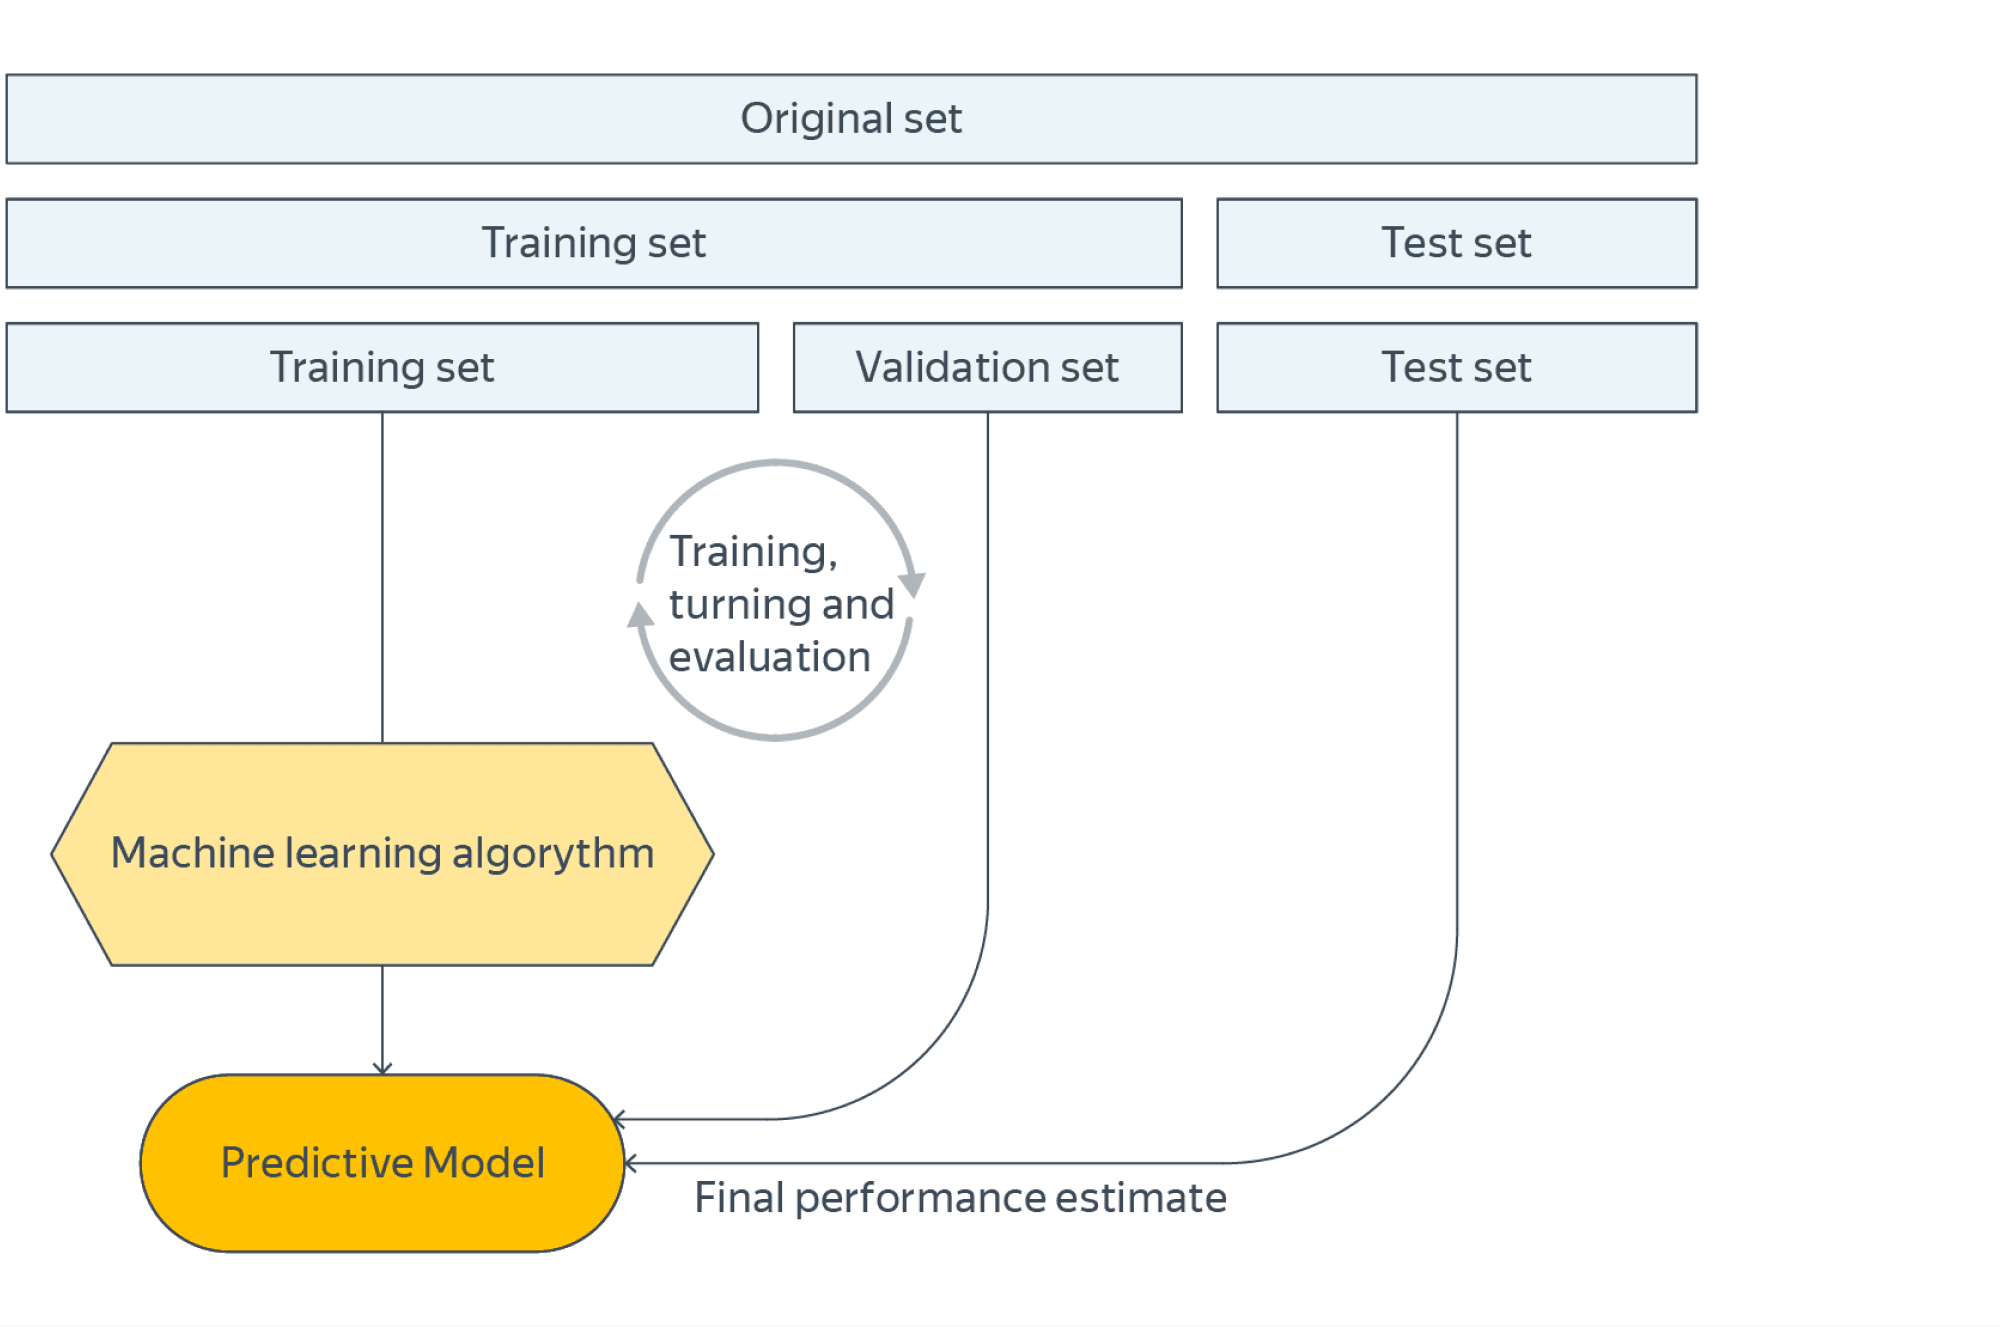

● Второй вариант — провести кросс-валидацию. Кросс-валидация может быть
нужна в случаях, если данных мало или мы не хотим зависеть от конкретного
выбора валидационного множества. Примерный алгоритм вы можете увидеть
на слайде:
— зафиксировать некоторое тестовое множество и отложить его;
— разделить оставшееся множество данных на некое количество
подмножеств, пройтись по ним циклом, на каждой итерации фиксируя один
фолд в качестве валидационного и обучаясь на остальных;
— в качестве оценки качества модели взять среднее значение
валидационной метрики по фолдам;
— финальное сравнение моделей с уже подобранными гиперпараметрами
проводить на отложенном тестовом множестве.

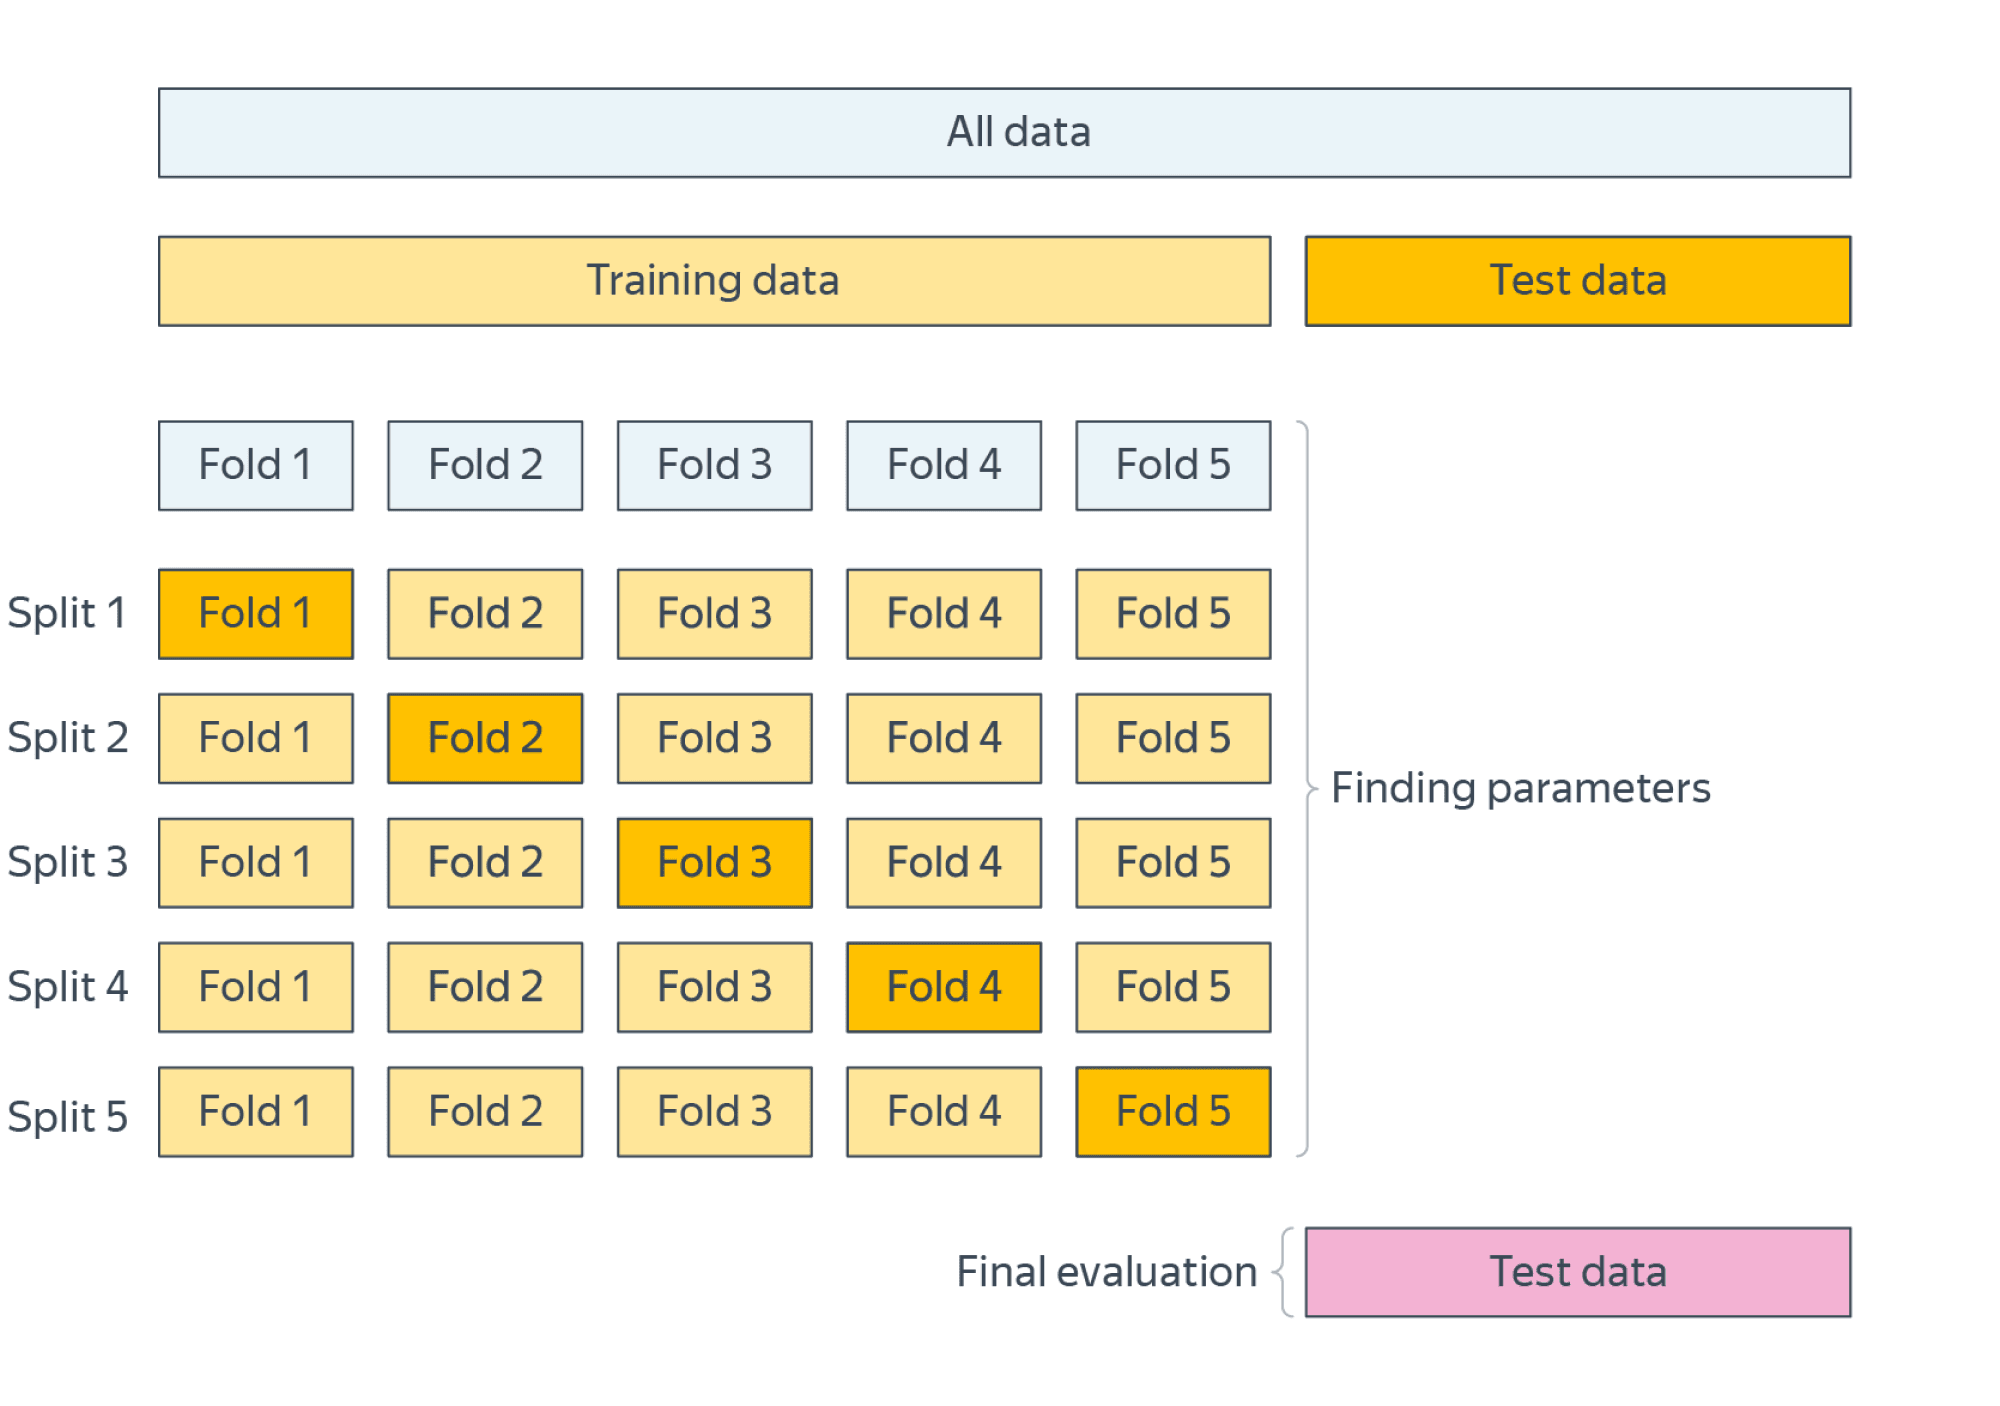

## Grid Search
Самый естественный способ организовать перебор наборов гиперпараметров —
сделать перебор по сетке (Grid Search):
● для каждого гиперпараметра фиксируется несколько значений;
● перебираются все комбинации значений различных гиперпараметров, на
каждой из этих комбинаций модель обучается и тестируется;
● выбирается комбинация, на которой модель показывает лучшее качество.
Например, для решающих деревьев можно перебирать по сетке сочетания
значений максимальной глубины дерева и различные критерии ветвления
(критерий Джини, например).

Перебор некоторых значений гиперпараметров можно вести по логарифмической
шкале, так как это позволяет быстрее определить правильный порядок параметра и
в то же время значительно уменьшить время поиска. Так можно подбирать,
например, значение learning rate для градиентного спуска, значение константы
регуляризации для линейной регрессии или метода SVM.
Сразу видно естественное ограничение данного метода: если комбинаций
параметров слишком много либо каждое обучение / тест длится долго, алгоритм не
завершится за разумное время.

## Random Search
Если у вас возникает очень большое количество комбинаций параметров, вы
можете какими-то способами пытаться справляться с этой проблемой, есть
несколько вариантов:
● можно взять меньше значений каждого гиперпараметра, но тогда есть шансы
пропустить наилучшую комбинацию;
● можно уменьшить число фолдов в кросс-валидации, но оценка параметров
станет более шумной;
● можно оптимизировать параметры последовательно, а не перебирать их
комбинации, но снова есть шанс получить неоптимальное решение;
● можно перебирать не все комбинации гиперпараметров, а только случайное
подмножество.

Для каждого гиперпараметра
задаётся распределение, из которого выбирается его значение, и комбинация
гиперпараметров составляется семплированием из этих распределений. Таким
образом, благодаря случайному выбору очередной комбинации гиперпараметров
вы можете найти оптимальную комбинацию за меньшее число итераций. Вот эта
картиночка хорошо иллюстрирует отличия поиска по сетке от случайного поиска:

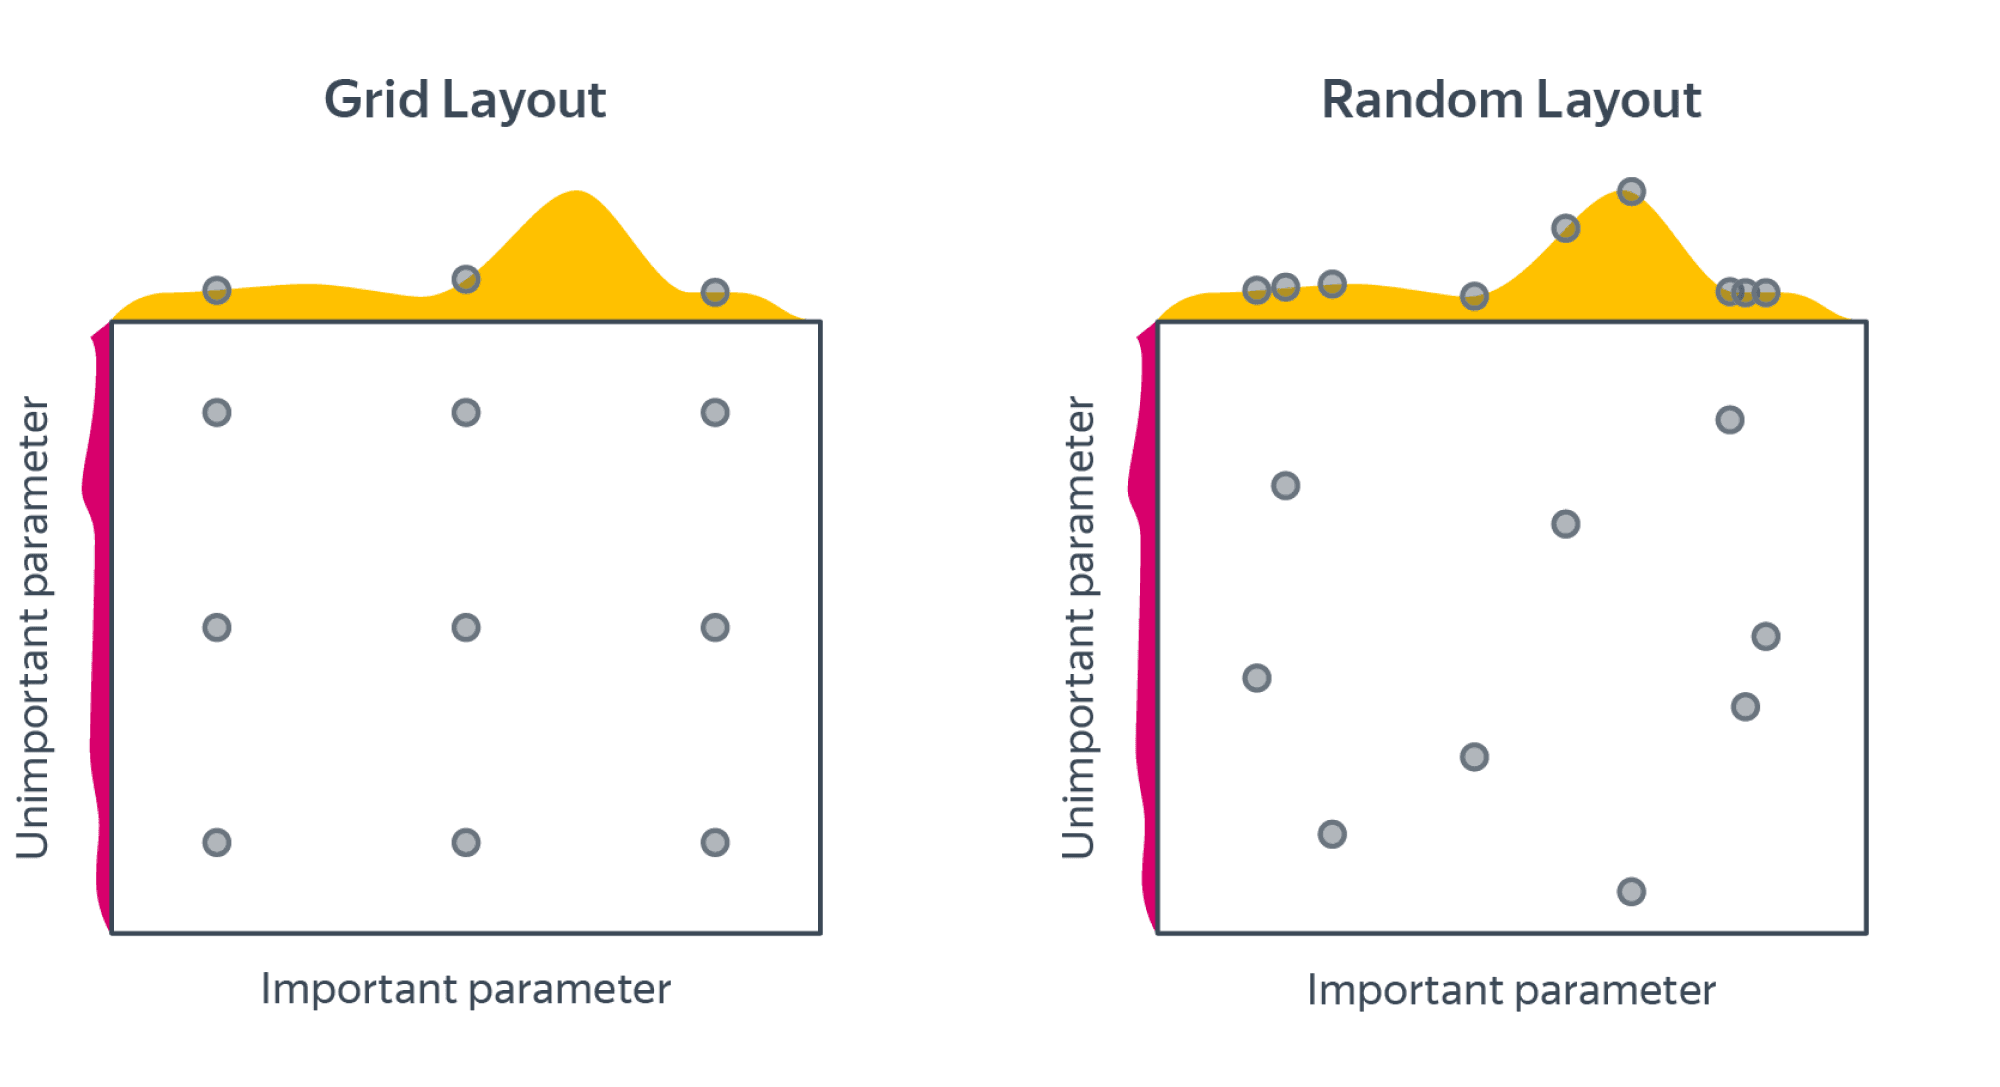

Идея, проиллюстрированная на этой картинке, примерно в следующем. Качество
нашей модели в зависимости от гиперпараметров — это функция многих
переменных с некоторой нетривиальной поверхностью. Но эта поверхность может
от одной из своих переменных зависеть сильно меньше, чем от другой. Если бы мы
знали, какой гиперпараметр важнее для перформанса модели, мы бы рассмотрели
больше его возможных значений, но часто у нас нет такой информации, и мы
рассматриваем некоторое наперёд заданное число значений для каждого
гиперпараметра. Random Search может за то же число итераций, что и Grid Search,
рассмотреть более разнообразные значения гиперпараметров. Тем самым он с
большей вероятностью найдёт те значения, которые больше всего влияют на
качество модели, а значит, с большей вероятностью найдёт наилучшую
комбинацию значений гиперпараметров.

## Exploration vs exploitation
Exploration - исследование
меньших областей поиска оптимальных гиперпараметров, при этом меньшая
вероятность пропустить оптимальное значение.

Exploitation - выбирать большее
количество областей, считая что именно в них находится оптимальное значение
гиперпараметра.

# Визуализация моделей

Использованы три разных алгоритма и визуализиронана их работа



In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import mlxtend
from sklearn.datasets import make_moons, make_circles

In [ ]:
from typing_extensions import assert_type
from sklearn.model_selection import train_test_split

def make_sunny_moons (n_sun = 50, n_moons = 100, noise = 0.0, sun_radius = 1.9, theta = None):
  X_moons, y_moons = make_moons (n_samples=n_moons, noise=noise)
  if not n_sun:
    return X_moons, y_moons

  np.random.seed(0xBEEFBAD)
  angles = np.arange(0, 2 * np.pi, 2 * np.pi / n_sun)
  X_sun = sun_radius * np.column_stack([np.cos(angles), np.sin(angles)]) + np.array([0.5, 0.25])
  X_sun += np.random.normal(scale=noise, size=X_sun.shape)
  y_sun = 2 * np.ones(n_sun)
  X = np.vstack([X_moons, X_sun])
  y = np.concatenate([y_moons, y_sun]). astype(int)
  X -= X.mean(axis=0)

  if theta is None:
    theta = np.pi / 4

  c, s = np.cos(theta), np.sin(theta)
  R = np.array([[c, -s], [s, c]])
  X = X @ R
  return X, y

In [ ]:
!pip install mlxtend==0.19.0 --upgrade --no-deps

In [ ]:
X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
import mlxtend
mlxtend.__version__

'0.19.0'

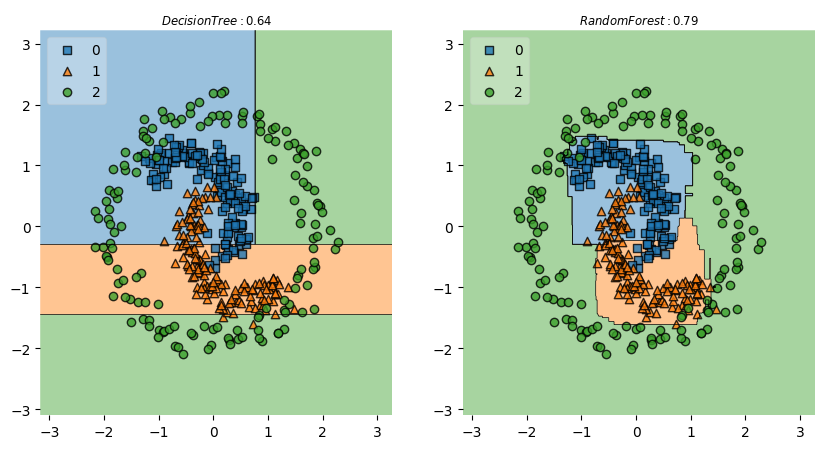

In [ ]:
clf0 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
clf1 = RandomForestClassifier(random_state=1, n_estimators=100, max_depth=3)
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(10,5))
labels = ['Decision Tree ', 'Random Forest ']
for clf, lab, grd in zip([clf0, clf1,],
                         labels,
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    a = accuracy_score(y_test, clf.predict(X_test))
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title('$_{'+str(lab)+ ': ' +str('{:.2f}'.format(a))+'}$')

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(valve) for valve in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.69%


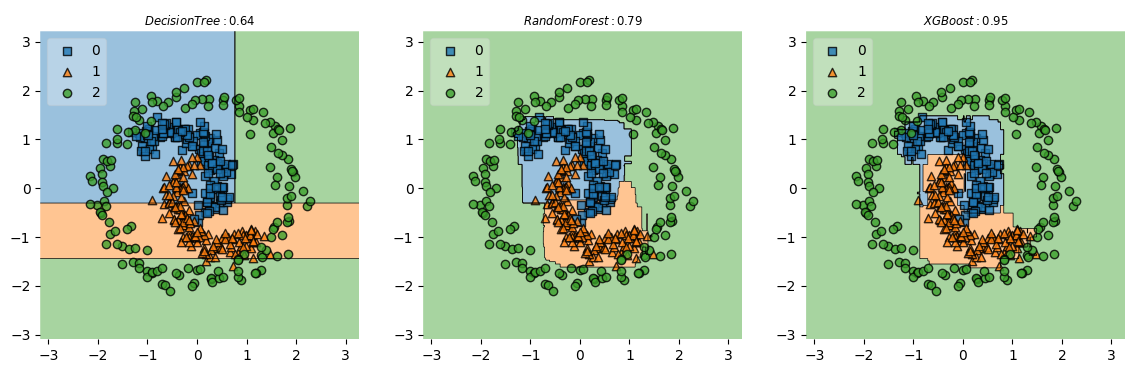

In [ ]:
clf0 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
clf1 = RandomForestClassifier(random_state=1, n_estimators=100, max_depth=3)
clf2 = XGBClassifier()
gs = gridspec.GridSpec(1, 3)
fig = plt.figure(figsize=(14,4))
labels = ['Decision Tree ', 'Random Forest ', 'XGBoost ']
for clf, lab, grd in zip([clf0, clf1, clf2],
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    a = accuracy_score(y_test, clf.predict(X_test))
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title('$_{'+str(lab)+ ': ' +str('{:.2f}'.format(a))+'}$')

In [ ]:
!pip install CatBoost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
train_data = Pool(
    [
        [[0.1, 0.12, 0.33], [1.0, 0.7], 2, "male"],
        [[0.0, 0.8, 0.2], [1.1, 0.2], 1, "female"],
        [[0.2, 0.31, 0.1], [0.3, 0.11], 2, "female"],
        [[0.01, 0.2, 0.9], [0.62, 0.12], 1, "male"], # обучеющие данные для catboost
        ],
        label = [1, 0, 0, 1],
        cat_features=[3],
        embedding_features=[0, 1]
)

eval_data = Pool(
        [
        [[0.2, 0.1, 0.3], [1.2, 0.3], 1, "female"],
        [[0.33, 0.22, 0.4], [0.98, 0.5], 2, "female"],
        [[0.78, 0.29, 0.67], [0.76, 0.34], 2, "male"],
        ], # тастирование
        label = [0, 1, 1],
        cat_features=[3],
        embedding_features=[0, 1]
)

numerical_idx = 3
column_transform = ColumnTransformer([('n', MinMaxScaler(), numerical_idx)], remainder='passthrough')
scaled_X = column_transform.fit_transform(train_data)
new_df = pd.DataFrame(scaled_X)
new_df = new_df.infer_objects() # converts the datatype to their most accurate datatype
cat_features_new = [new_df.columns.get_loc(col) for col in new_df.select_dtypes(include=['object', 'bool']).columns]


model = CatBoostClassifier(iterations=10)
model.fit(train_data, eval_data)
preds_class = model.predict(eval_data)